In [1]:
import tensorflow as tf

# Load images from the directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'fish_image',                 # Replace with your dataset directory path
    image_size=(180, 180),        # Resize images to 180x180
    batch_size=64,                # Adjusted batch size for larger dataset
    label_mode='int'              # Return labels as integers
)

# Displaying a batch of images and labels
for images, labels in train_ds.take(1):
    print(images.shape)           # (64, 180, 180, 3) for a batch of 64 images
    print(labels.numpy())         # Array of labels

Found 27072 files belonging to 16 classes.
(64, 180, 180, 3)
[ 2  6  7  7  2  2  6  7  2  6  6  7  7  7 11  4 14  7  6  4  6  7  2  4
 14  6  2 14  2  6  7  2  7  6  4  7  1  7  2  8  6  7  7  7  7 12  2  4
  7  7 11  7  5  2  7  1  7  7  4  7  4  7 11  7]


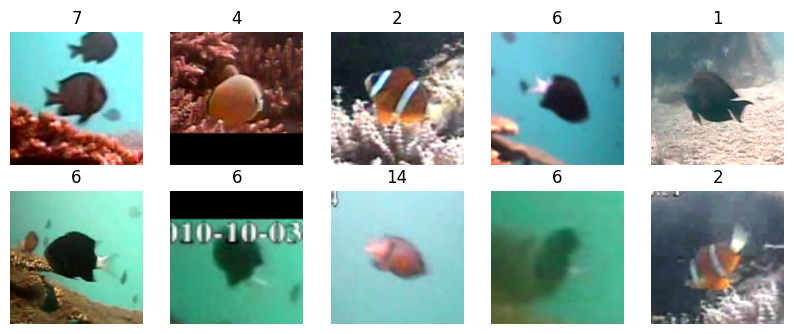

In [2]:
# Display 10 images
import tensorflow as tf
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(10):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators with image augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Reserve 20% of data for validation
)

# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(
    'fish_image',  # Single directory for both training and validation with subset split
    target_size=(227, 227),     # AlexNet typically uses 227x227
    batch_size=64,
    class_mode='categorical',
    subset='training',
    shuffle=True  # Enable shuffling for better training generalization
)

# Load and preprocess validation data
validation_generator = train_datagen.flow_from_directory(
    'fish_image',
    target_size=(227, 227),
    batch_size=64,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Validation does not require shuffling
)

Found 21665 images belonging to 16 classes.
Found 5407 images belonging to 16 classes.


In [4]:
# Hyperparameters
input_shape = (227, 227, 3)  # Updated for AlexNet's typical input size
num_classes = 16  # Updated for 21 classes
batch_size = 64
epochs = 50

In [5]:
from tensorflow.keras import layers, models

def create_alexnet(input_shape=(227, 227, 3), num_classes=16):  # Set num_classes to 21
    model = models.Sequential()
    
    # First Convolutional Layer
    model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    
    # Second Convolutional Layer
    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    
    # Third Convolutional Layer
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    
    # Fourth Convolutional Layer
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    
    # Fifth Convolutional Layer
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))
    
    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    
    # Output Layer (21 classes)
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model

# Create the AlexNet model with 21 output classes
model = create_alexnet(num_classes=16)

# Show the model summary
model.summary()

C:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │          65,552 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,346,896 (222.58 MB)

 Trainable params: 58,346,896 (222.58 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

# Initialize the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='accuracy',     # Monitor the validation loss
    patience=7,             # Number of epochs to wait for improvement before stopping
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored metric
)

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,  # Maximum number of epochs
    callbacks=[early_stopping]  # Add the early stopping callback here
)

Epoch 1/50


C:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


338/338 ━━━━━━━━━━━━━━━━━━━━ 361s 1s/step - accuracy: 0.4671 - loss: 2.5329 - val_accuracy: 0.7729 - val_loss: 0.6954
Epoch 2/50
  1/338 ━━━━━━━━━━━━━━━━━━━━ 4:07 736ms/step - accuracy: 0.7656 - loss: 0.8077

C:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.7656 - loss: 0.8077 - val_accuracy: 0.0000e+00 - val_loss: 2.7075
Epoch 3/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 340s 998ms/step - accuracy: 0.8438 - loss: 0.5009 - val_accuracy: 0.8026 - val_loss: 0.7124
Epoch 4/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.8438 - loss: 0.3661 - val_accuracy: 0.3871 - val_loss: 1.3580
Epoch 5/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 332s 973ms/step - accuracy: 0.8997 - loss: 0.3498 - val_accuracy: 0.8728 - val_loss: 0.4058
Epoch 6/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - accuracy: 0.9688 - loss: 0.1048 - val_accuracy: 0.6774 - val_loss: 1.4383
Epoch 7/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.9246 - loss: 0.2632 - val_accuracy: 0.8690 - val_loss: 0.4204
Epoch 8/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 358us/step - accuracy: 0.8750 - loss: 0.3863 - val_accuracy: 1.0000 - val_loss: 0.1248
Epoch 9/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 342s 1s/step - accuracy: 0.9379 - loss: 0.2166 - val_a

In [7]:
#saving the model

In [8]:
model.save('alexnet_model.keras')

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy}")
print(f"Validation Loss: {loss}")

85/85 ━━━━━━━━━━━━━━━━━━━━ 47s 551ms/step - accuracy: 0.8899 - loss: 0.3758
Validation Accuracy: 0.9114111065864563
Validation Loss: 0.3218447268009186


In [10]:
#Train data F1 score

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict labels for validation data
X_pred = model.predict(train_generator)
x_pred = np.argmax(X_pred, axis=1)

# Get the ground truth labels
x_true = train_generator.classes

# Classification report
print("Classification Report:\n", classification_report(x_true, x_pred, target_names=train_generator.class_indices.keys()))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(x_true, x_pred))

339/339 ━━━━━━━━━━━━━━━━━━━━ 198s 584ms/step
Classification Report:
                            precision    recall  f1-score   support

     Abudefduf vaigiensis       0.00      0.00      0.00        79
   Acanthurus nigrofuscus       0.02      0.01      0.01       175
       Amphiprion clarkii       0.15      0.15      0.15      3240
   Canthigaster valentini       0.02      0.01      0.01       118
      Chaetodon lunulatus       0.10      0.10      0.10      2028
   Chaetodon trifascialis       0.01      0.01      0.01       152
         Chromis chrysura       0.14      0.13      0.14      2875
    Dascyllus reticulatus       0.44      0.47      0.46      9690
     Hemigymnus fasciatus       0.00      0.00      0.00       193
    Hemigymnus melapterus       0.00      0.00      0.00        34
          Lutjanus fulvus       0.00      0.01      0.01       165
       Myripristis kuntee       0.01      0.01      0.01       360
        Neoniphon sammara       0.00      0.00      0.00   

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict labels for validation data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get the ground truth labels
y_true = validation_generator.classes

# Classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

85/85 ━━━━━━━━━━━━━━━━━━━━ 47s 556ms/step
Classification Report:
                            precision    recall  f1-score   support

     Abudefduf vaigiensis       0.25      0.05      0.09        19
   Acanthurus nigrofuscus       0.35      0.16      0.22        43
       Amphiprion clarkii       0.97      0.97      0.97       809
   Canthigaster valentini       0.20      0.03      0.06        29
      Chaetodon lunulatus       0.94      0.99      0.96       506
   Chaetodon trifascialis       0.00      0.00      0.00        38
         Chromis chrysura       0.99      0.86      0.92       718
    Dascyllus reticulatus       0.90      0.97      0.94      2422
     Hemigymnus fasciatus       0.39      0.19      0.25        48
    Hemigymnus melapterus       0.04      0.12      0.06         8
          Lutjanus fulvus       0.75      0.93      0.83        41
       Myripristis kuntee       0.63      0.87      0.73        90
        Neoniphon sammara       1.00      1.00      1.00      

C:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

C:\Users\PRIYANSHU\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8789 - loss: 0.4244 - val_accuracy: 0.9631 - val_loss: 0.1285
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9626 - loss: 0.1241 - val_accuracy: 0.9682 - val_loss: 0.0993
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9758 - loss: 0.0809 - val_accuracy: 0.9748 - val_loss: 0.0857
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9821 - loss: 0.0587 - val_accuracy: 0.9769 - val_loss: 0.0752
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9866 - loss: 0.0452 - val_accuracy: 0.9781 - val_loss: 0.0729
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9904 - loss: 0.0354 - val_accuracy: 0.9775 - val_loss: 0.0730
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9912 - loss: 0.0280 - val_accuracy: 0.9762 - val_loss: 0.0770
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9924 - loss: 0.0236 - 

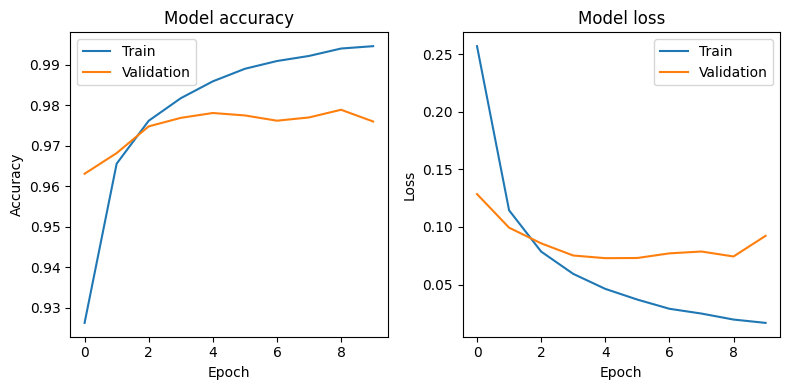

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load dataset (example using MNIST dataset)
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.mnist.load_data()

# Preprocess the data: normalize and reshape
X_train = X_train / 255.0
X_val = X_val / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_val = tf.keras.utils.to_categorical(y_val, 10)

# Create a simple model (for example purposes)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

# Plot training & validation accuracy/loss
plt.figure(figsize=(8, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Show the plots
plt.tight_layout()
plt.show()

In [14]:
#Prediction

In [17]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model (replace 'model_path.h5' with your actual model path)
model = load_model('alexnet_model.keras')

# Load an image to test the model (replace 'image_path.jpg' with the actual image path)
img_path = "D:/OneDrive/Desktop/ML DOMAIN PROJECTS/Image analytics/fish_image/Acanthurus nigrofuscus/fish_000026190001_02554.png"
img = image.load_img(img_path, target_size=(227, 227))  # VGG16 expects 224x224 images
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image as per VGG16 preprocessing

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest probability

# Print the result
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted class: [7]


In [18]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

85/85 ━━━━━━━━━━━━━━━━━━━━ 47s 555ms/step


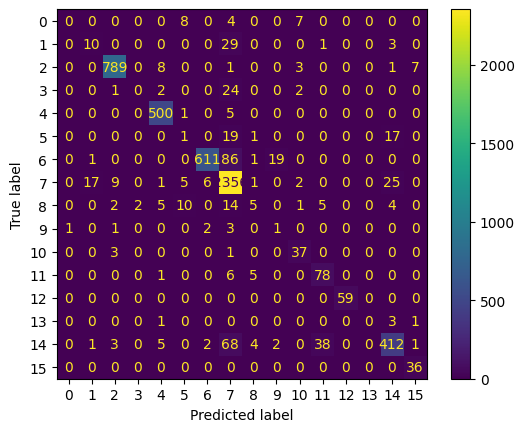

In [20]:
# Step 1: Get predictions from the model
y_pred = model.predict(validation_generator)

# Step 2: Convert probabilities to predicted class labels
y_pred_class = np.argmax(y_pred, axis=1)

# Step 3: Get true labels
y_true = validation_generator.classes

# Step 4: Create the confusion matrix
cm = confusion_matrix(y_true, y_pred_class)

# Step 5: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

85/85 ━━━━━━━━━━━━━━━━━━━━ 47s 555ms/step


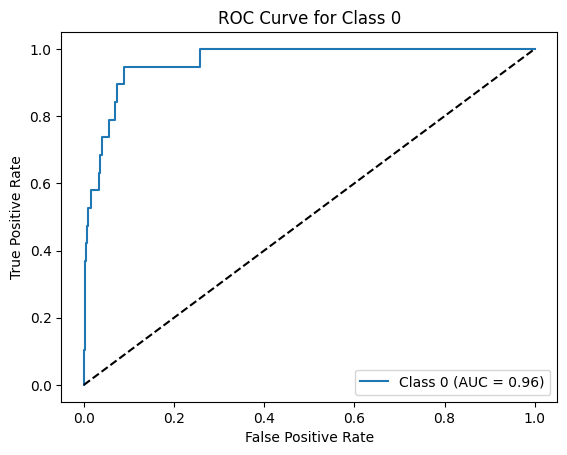

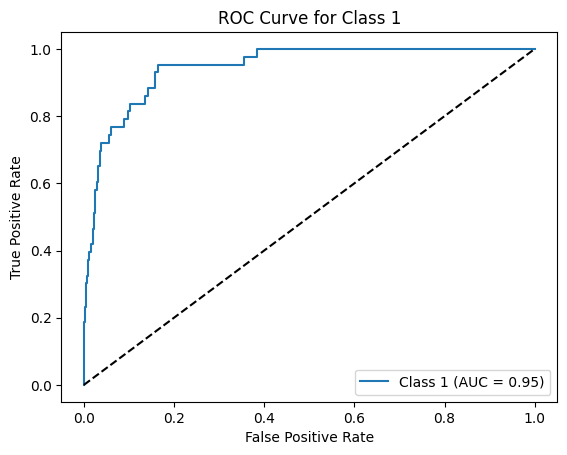

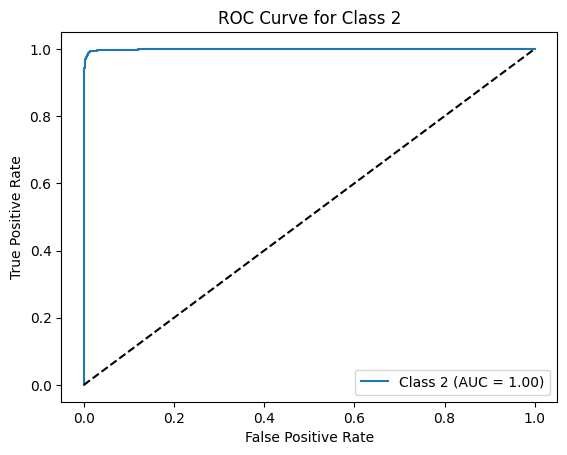

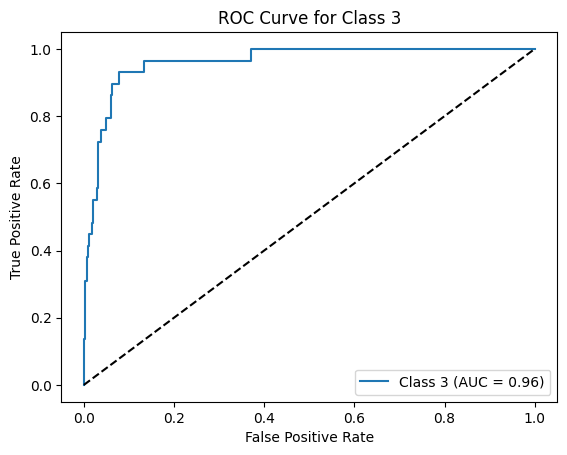

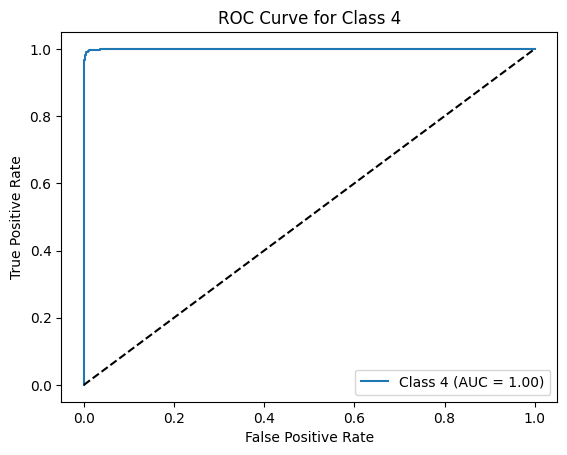

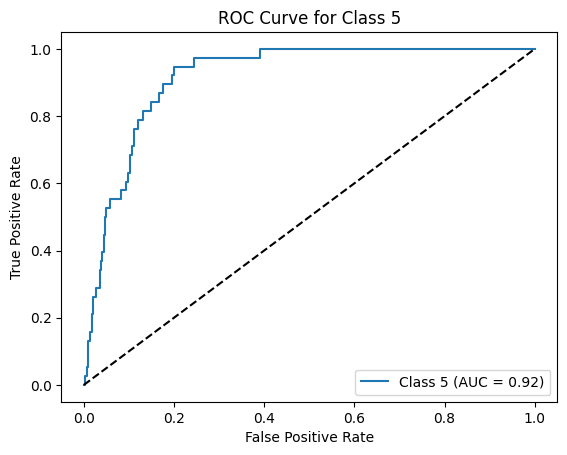

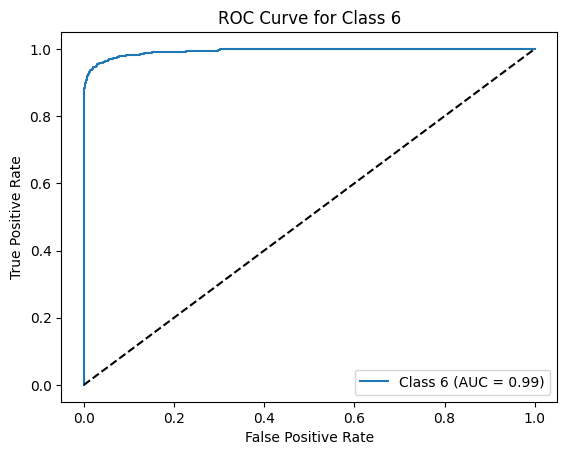

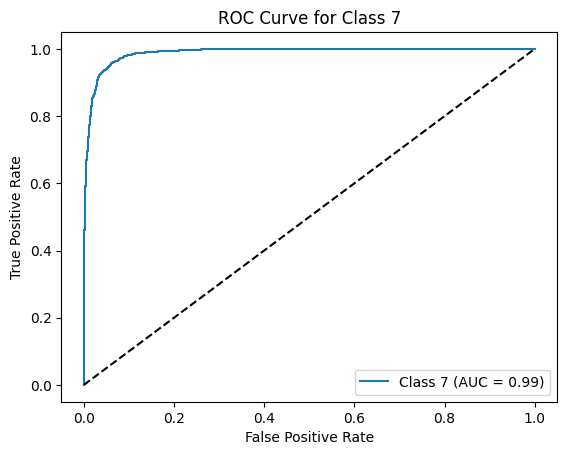

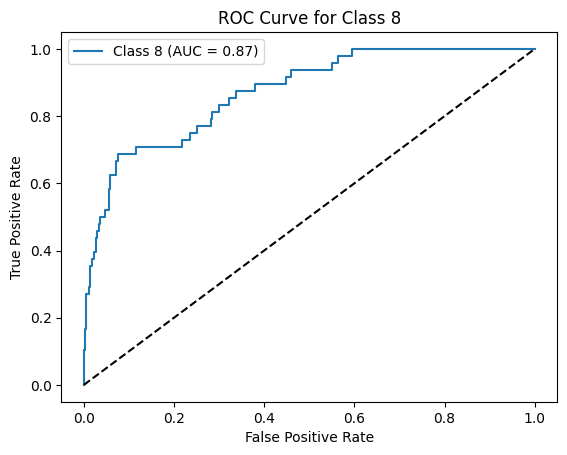

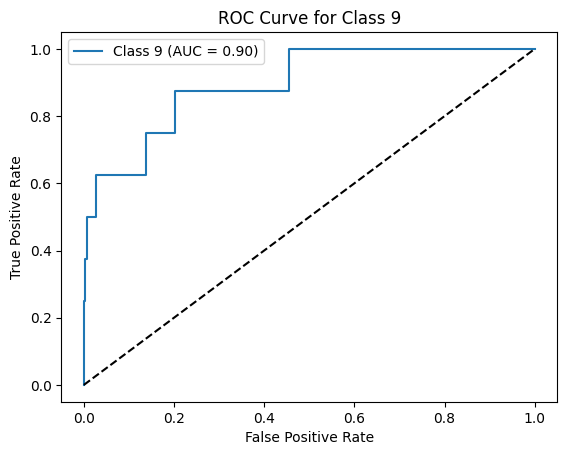

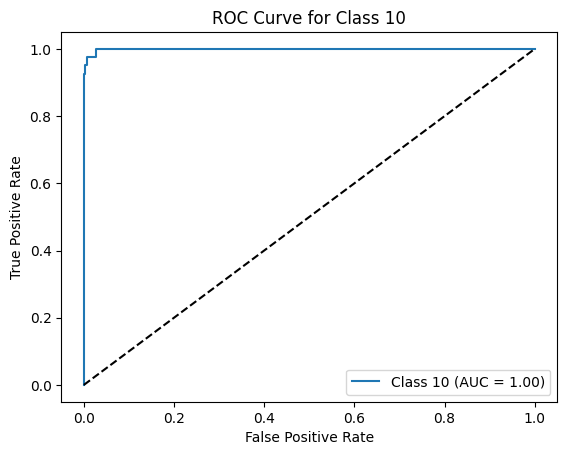

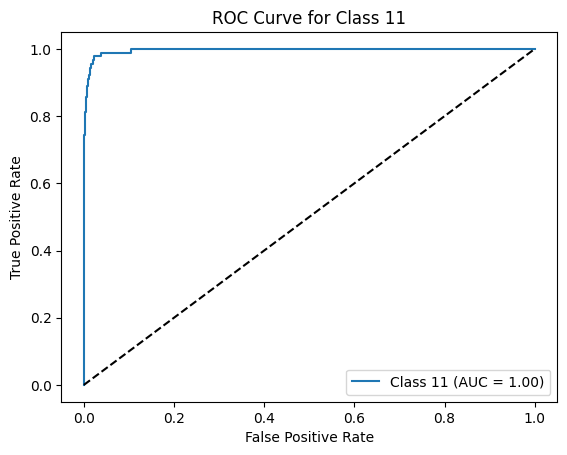

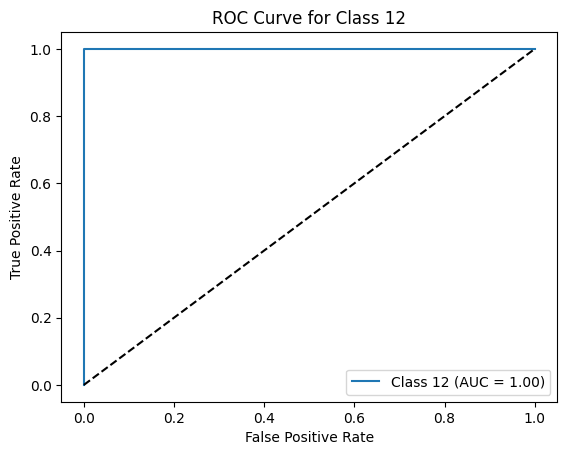

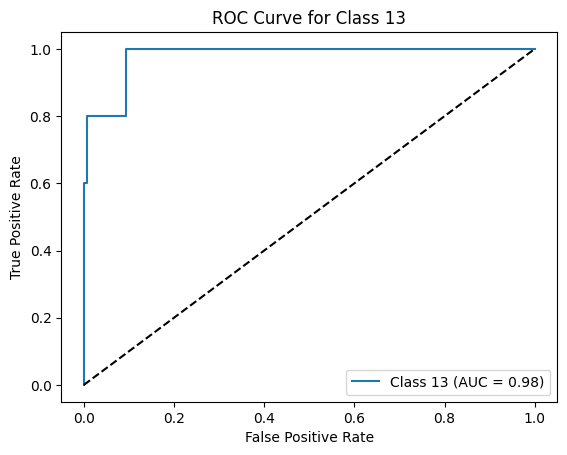

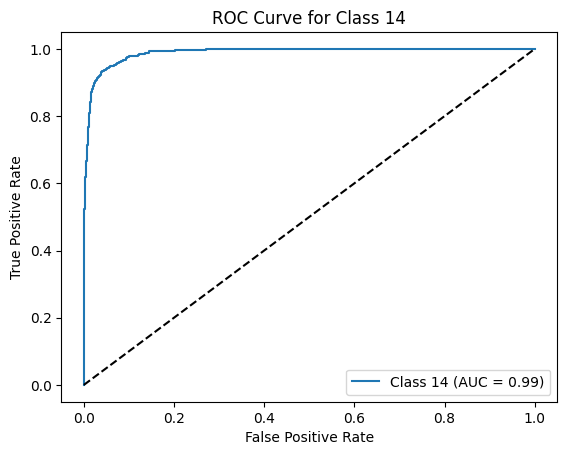

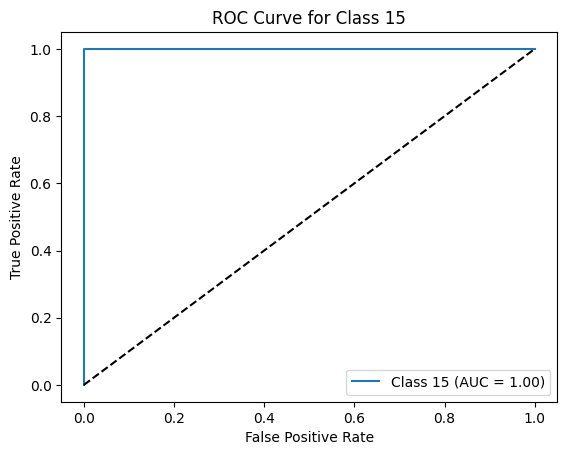

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for each class
y_pred_prob = model.predict(validation_generator)
y_true = validation_generator.classes

# Binarize the labels for one-vs-rest ROC computation
y_true_binarized = label_binarize(y_true, classes=list(range(num_classes)))

# Initialize dictionaries to store the FPR, TPR, and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and AUC for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_true_binarized[:, i], y_pred_prob[:, i])
    
    # Plot each ROC curve separately
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for Class {i}')
    plt.legend(loc='best')
    plt.show()